# Demo of Gated Recurrent Unit

In [2]:
# Standard Math / Data libraries
import numpy as np
import pandas as pd

# Data Scrape Package
import pandas_datareader.data as web

# Plotting package
import matplotlib.pyplot as plt
# Scaling Package
from sklearn.preprocessing import MinMaxScaler

# Keras Network @ https://www.tensorflow.org/guide/keras/gru
import tensorflow as tf # version tensorflow==2.4.0
from tensorflow import keras
from keras import layers
#from tensorflow.keras import layers

# Set Random seed
import random
random.seed(2505)

2022-09-16 16:19:01.272368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 16:19:01.413715: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-16 16:19:01.465134: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 16:19:01.920763: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

# Cleaning the Data 

In [3]:
# Daily Data on Gold.
tick = 'GC=F'
#gold = web.get_data_yahoo(tick,'12/27/2015',interval='d')
data= pd.read_csv("/home/rehan/Downloads/panda_research/combined_labled_k6.csv")

In [14]:
gold= data.iloc[: , 1:7]
gold

,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5]
0,1.050352,0.036084,0.153670,-0.208722,-0.226335,0.071900
1,1.040706,0.052485,0.160204,-0.204533,-0.222889,0.070273
2,1.070528,0.033901,0.198342,-0.208156,-0.228432,0.070408
3,1.078726,0.032952,0.203791,-0.208763,-0.228608,0.071877
4,1.046257,0.048101,0.215115,-0.205263,-0.223011,0.071184
...,...,...,...,...,...,...
35833,2.197765,0.698508,-0.035440,-0.127779,-0.357269,-0.376626
35834,2.181485,0.686810,-0.030687,-0.127087,-0.355794,-0.378369
35835,2.187751,0.723994,-0.046943,-0.124015,-0.355552,-0.374260
35836,2.173231,0.764835,-0.166300,-0.116387,-0.359594,-0.378620


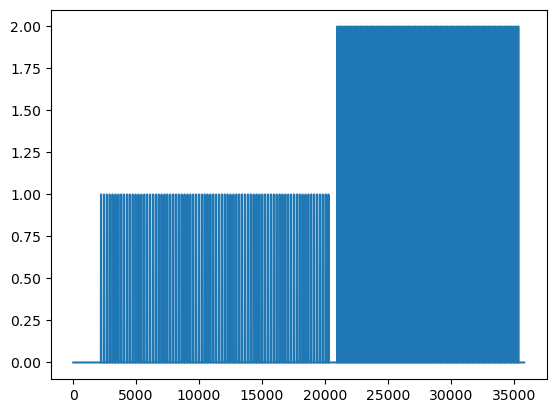

In [16]:
plt.plot(data['cluster'])

In [21]:
gold.values

array([[ 1.05035197,  0.03608361,  0.15366994, -0.20872176, -0.22633529,
         0.07190013],
       [ 1.04070593,  0.05248472,  0.16020391, -0.20453307, -0.22288895,
         0.07027318],
       [ 1.07052848,  0.03390063,  0.19834174, -0.20815593, -0.22843161,
         0.07040757],
       ...,
       [ 2.18775072,  0.72399379, -0.04694298, -0.1240152 , -0.3555519 ,
        -0.3742596 ],
       [ 2.17323085,  0.76483473, -0.16630029, -0.11638658, -0.3595942 ,
        -0.37862044],
       [ 2.21371423,  0.70888995, -0.01968097, -0.12413878, -0.36091259,
        -0.37732746]])

In [19]:
#returns = gold['cluster'].pct_change() # Used for univariate example.
returns = data['cluster']
column_names = gold.columns
x = gold.values #returns a numpy array
min_max_scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [22]:
x_scaled

array([[0.31531986, 0.62765369, 0.75464588, 0.45017587, 0.63641474,
        0.64530948],
       [0.31253532, 0.62962466, 0.75810344, 0.45373317, 0.64053097,
        0.64348093],
       [0.32114426, 0.62739136, 0.77828475, 0.45065642, 0.63391094,
        0.64363198],
       ...,
       [0.64365528, 0.71032188, 0.64848798, 0.52211411, 0.48208143,
        0.1438633 ],
       [0.6394638 , 0.71522986, 0.58532794, 0.52859282, 0.47725339,
        0.13896208],
       [0.65115023, 0.70850681, 0.66291416, 0.52200916, 0.47567873,
        0.14041528]])

In [23]:
pct_c_gold = df
df

,0,1,2,3,4,5
0,0.315320,0.627654,0.754646,0.450176,0.636415,0.645309
1,0.312535,0.629625,0.758103,0.453733,0.640531,0.643481
2,0.321144,0.627391,0.778285,0.450656,0.633911,0.643632
3,0.323511,0.627277,0.781168,0.450141,0.633700,0.645283
4,0.314138,0.629098,0.787161,0.453113,0.640385,0.644504
...,...,...,...,...,...,...
35833,0.646546,0.707259,0.654575,0.518918,0.480031,0.141204
35834,0.641847,0.705853,0.657090,0.519505,0.481792,0.139244
35835,0.643655,0.710322,0.648488,0.522114,0.482081,0.143863
35836,0.639464,0.715230,0.585328,0.528593,0.477253,0.138962


In [25]:
pct_c_gold.columns = column_names
pct_c_gold.columns

Index(['joint_effort[0]', 'joint_effort[1]', 'joint_effort[2]',
       'joint_effort[3]', 'joint_effort[4]', 'joint_effort[5]'],
      dtype='object')

In [26]:
pct_c_gold

,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5]
0,0.315320,0.627654,0.754646,0.450176,0.636415,0.645309
1,0.312535,0.629625,0.758103,0.453733,0.640531,0.643481
2,0.321144,0.627391,0.778285,0.450656,0.633911,0.643632
3,0.323511,0.627277,0.781168,0.450141,0.633700,0.645283
4,0.314138,0.629098,0.787161,0.453113,0.640385,0.644504
...,...,...,...,...,...,...
35833,0.646546,0.707259,0.654575,0.518918,0.480031,0.141204
35834,0.641847,0.705853,0.657090,0.519505,0.481792,0.139244
35835,0.643655,0.710322,0.648488,0.522114,0.482081,0.143863
35836,0.639464,0.715230,0.585328,0.528593,0.477253,0.138962


# Univariate Forecasting (GRU)

In [27]:
#returns=returns+1
returns

0        0
1        0
2        0
3        0
4        0
        ..
35833    0
35834    0
35835    0
35836    0
35837    0
Name: cluster, Length: 35838, dtype: int64

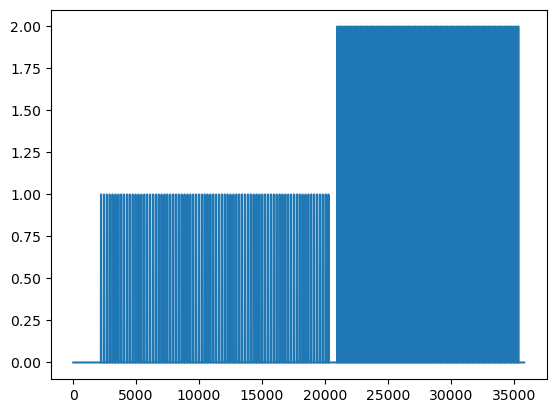

In [28]:
plt.plot(returns)

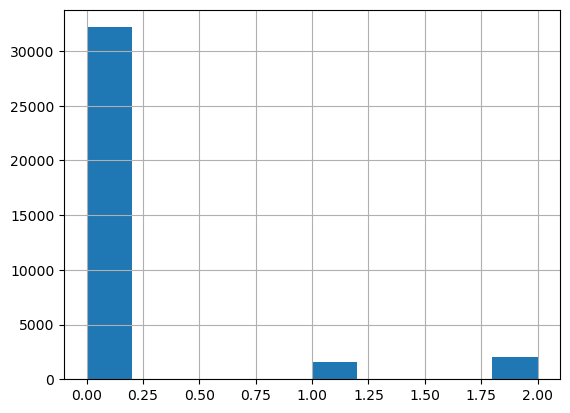

In [29]:
returns.hist()

In [30]:
# Flatten this matrix down.
npa = returns.values[1:].reshape(-1,1) # Python is smart to recognize whatever dimension you need by using this parameter
print(len(npa))
# # Let's scale the data -- this helps avoid the exploding gradient issue
scale = MinMaxScaler(feature_range=(0,1)) # This is by default.
npa = scale.fit_transform(npa)
print(len(npa))

35837
35837


In [31]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples]) # Independent Samples
    Y.append(npa[i+samples][0]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])]
Testing Data: Length is  1 :  [0.0]


In [32]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9 * X.shape[0])
print('Threshold is', threshold)

Dimensions of X (35827, 10, 1) Dimensions of Y (35827,)
Threshold is 32244


In [33]:
# Let's build the GRU
model = keras.Sequential()

# Add a GRU layer with 3 units.
model.add(layers.GRU(10,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape=(X.shape[1], X.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                390       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


2022-09-16 16:28:59.034771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 16:28:59.076549: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 16:28:59.076727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 16:28:59.077423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [34]:
# Fitting the data
history = model.fit(X[:threshold],
                    Y[:threshold],
                    shuffle = False, # Since this is time series data
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/100


2022-09-16 16:33:06.729284: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-09-16 16:33:06.869210: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


807/807 [==============================] - 5s 2ms/step - loss: 0.0061 - val_loss: 0.0115
Epoch 2/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0047 - val_loss: 0.0114
Epoch 3/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0047 - val_loss: 0.0110
Epoch 4/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0044 - val_loss: 0.0110
Epoch 5/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0110
Epoch 6/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0109
Epoch 7/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0109
Epoch 8/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0110
Epoch 9/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0109
Epoch 10/100
807/807 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.0110
E

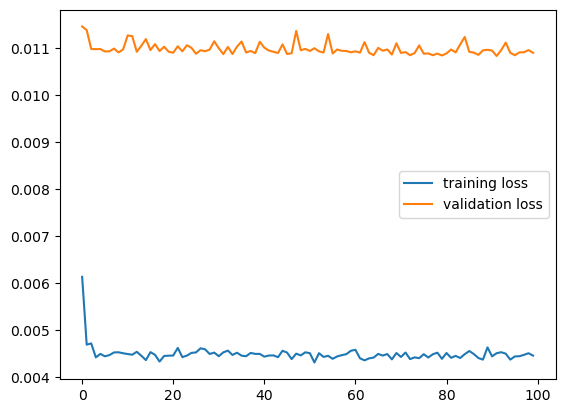

In [35]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

# Multi-Step Forecast

In [36]:
# Predictions using the 'sliding/rolling window approach'
# Multi step forecast.
# Using self predictions for making future predictions
print(threshold)
true_Y = Y[threshold:]
pred_Y = []
print('Number of Forecasts to do: ',Y.shape[0] - round(Y.shape[0]*0.9))
latest_input = X[threshold-1:threshold]

for i in range(Y.shape[0] - round(Y.shape[0]*0.9) ):
    # Prediction
    p = model.predict(latest_input.reshape(1,X.shape[1],1))[0,0]
    
    # Update predictions
    pred_Y.append(p)
    latest_input = np.append(X[threshold][1:], p)

32244
Number of Forecasts to do:  3583
1/1 [==============================] - 0s 20ms/step


In [37]:
print(X)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [38]:
print(Y)

[0. 0. 0. ... 0. 0. 0.]


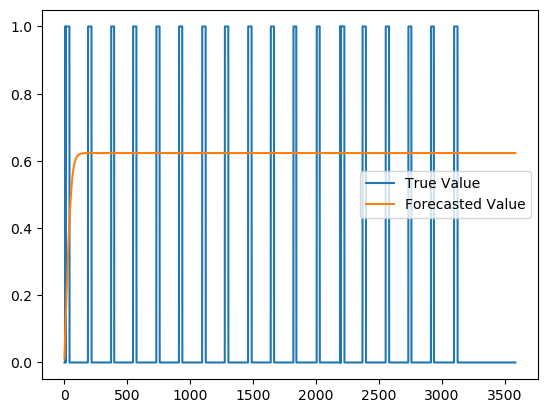

In [39]:
plt.plot(true_Y, label = 'True Value')
plt.plot(pred_Y, label = 'Forecasted Value')
plt.legend()
# Model just copied the same value over and over again. Hence, model is not very robust.
# It's just predicting the mean.

In [101]:
pct_c_gold

,Unnamed: 0,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5],cluster
0,0.000000,0.315320,0.627654,0.754646,0.450176,0.636415,0.645309,0.0
1,0.000028,0.312535,0.629625,0.758103,0.453733,0.640531,0.643481,0.0
2,0.000056,0.321144,0.627391,0.778285,0.450656,0.633911,0.643632,0.0
3,0.000084,0.323511,0.627277,0.781168,0.450141,0.633700,0.645283,0.0
4,0.000112,0.314138,0.629098,0.787161,0.453113,0.640385,0.644504,0.0
...,...,...,...,...,...,...,...,...
35833,0.999888,0.646546,0.707259,0.654575,0.518918,0.480031,0.141204,0.0
35834,0.999916,0.641847,0.705853,0.657090,0.519505,0.481792,0.139244,0.0
35835,0.999944,0.643655,0.710322,0.648488,0.522114,0.482081,0.143863,0.0
35836,0.999972,0.639464,0.715230,0.585328,0.528593,0.477253,0.138962,0.0


# Multi-Variate Forecasting

# Using our Training and Testing sets, Let's create our inputs.

In [44]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(pct_c_gold.shape[0] - samples):
    X.append(pct_c_gold.iloc[i:i+samples, 0:6].values) # Independent Samples
    Y.append(data.iloc[i+samples, 7:].values) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0.31531986, 0.62765369, 0.75464588, 0.45017587, 0.63641474,
        0.64530948],
       [0.31253532, 0.62962466, 0.75810344, 0.45373317, 0.64053097,
        0.64348093],
       [0.32114426, 0.62739136, 0.77828475, 0.45065642, 0.63391094,
        0.64363198],
       [0.32351055, 0.62727742, 0.78116809, 0.45014119, 0.63370038,
        0.64528297],
       [0.31413789, 0.62909788, 0.7871608 , 0.45311335, 0.64038469,
        0.64450421],
       [0.31862388, 0.62736877, 0.80631028, 0.45149287, 0.63827888,
        0.64624657],
       [0.28508284, 0.62852519, 0.74630497, 0.45232453, 0.66421428,
        0.64576765],
       [0.33052171, 0.62720619, 0.79605968, 0.45151258, 0.62679222,
        0.64479465],
       [0.32288002, 0.63299929, 0.77692562, 0.45813866, 0.63495196,
        0.64482681],
       [0.31288191, 0.62708426, 0.76183286, 0.45010456, 0.64028152,
        0.64601714]])]
Testing Data: Length is  1 :  [array([0.])]


In [45]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (35828, 10, 6) Dimensions of Y (35828, 1)


In [46]:
print(X)

[[[0.31531986 0.62765369 0.75464588 0.45017587 0.63641474 0.64530948]
  [0.31253532 0.62962466 0.75810344 0.45373317 0.64053097 0.64348093]
  [0.32114426 0.62739136 0.77828475 0.45065642 0.63391094 0.64363198]
  ...
  [0.33052171 0.62720619 0.79605968 0.45151258 0.62679222 0.64479465]
  [0.32288002 0.63299929 0.77692562 0.45813866 0.63495196 0.64482681]
  [0.31288191 0.62708426 0.76183286 0.45010456 0.64028152 0.64601714]]

 [[0.31253532 0.62962466 0.75810344 0.45373317 0.64053097 0.64348093]
  [0.32114426 0.62739136 0.77828475 0.45065642 0.63391094 0.64363198]
  [0.32351055 0.62727742 0.78116809 0.45014119 0.63370038 0.64528297]
  ...
  [0.32288002 0.63299929 0.77692562 0.45813866 0.63495196 0.64482681]
  [0.31288191 0.62708426 0.76183286 0.45010456 0.64028152 0.64601714]
  [0.28888247 0.6291301  0.74971466 0.45328274 0.65800003 0.64332827]]

 [[0.32114426 0.62739136 0.77828475 0.45065642 0.63391094 0.64363198]
  [0.32351055 0.62727742 0.78116809 0.45014119 0.63370038 0.64528297]
  [0

In [47]:
print (Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [48]:
# # Get the training and testing set
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)

Training Length (32245, 10, 6) (32245, 1) Testing Length: (3583, 10, 6) (3583, 1)


In [49]:
trainX

array([[[0.31531986, 0.62765369, 0.75464588, 0.45017587, 0.63641474,
         0.64530948],
        [0.31253532, 0.62962466, 0.75810344, 0.45373317, 0.64053097,
         0.64348093],
        [0.32114426, 0.62739136, 0.77828475, 0.45065642, 0.63391094,
         0.64363198],
        ...,
        [0.33052171, 0.62720619, 0.79605968, 0.45151258, 0.62679222,
         0.64479465],
        [0.32288002, 0.63299929, 0.77692562, 0.45813866, 0.63495196,
         0.64482681],
        [0.31288191, 0.62708426, 0.76183286, 0.45010456, 0.64028152,
         0.64601714]],

       [[0.31253532, 0.62962466, 0.75810344, 0.45373317, 0.64053097,
         0.64348093],
        [0.32114426, 0.62739136, 0.77828475, 0.45065642, 0.63391094,
         0.64363198],
        [0.32351055, 0.62727742, 0.78116809, 0.45014119, 0.63370038,
         0.64528297],
        ...,
        [0.32288002, 0.63299929, 0.77692562, 0.45813866, 0.63495196,
         0.64482681],
        [0.31288191, 0.62708426, 0.76183286, 0.45010456, 0.640

In [50]:
# Let's build the GRU
model = keras.Sequential()

# Add a GRU layer with 15 units.
model.add(layers.GRU(15,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape=(X.shape[1], X.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 15)                1035      
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Fitting the data
history = model.fit(trainX,
                    trainY,
                    shuffle = False, # Since this is time series data
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1) # Verbose outputs data

Epoch 1/100
807/807 [==============================] - 3s 2ms/step - loss: 0.1617 - val_loss: 0.4924
Epoch 2/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1467 - val_loss: 0.4903
Epoch 3/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1459 - val_loss: 0.4876
Epoch 4/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1443 - val_loss: 0.4834
Epoch 5/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1430 - val_loss: 0.4774
Epoch 6/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1409 - val_loss: 0.4656
Epoch 7/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1388 - val_loss: 0.4416
Epoch 8/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1322 - val_loss: 0.4030
Epoch 9/100
807/807 [==============================] - 2s 2ms/step - loss: 0.1239 - val_loss: 0.3753
Epoch 10/100
807/807 [==============================] - 2s 3ms/step - loss: 0.1149 - val_lo

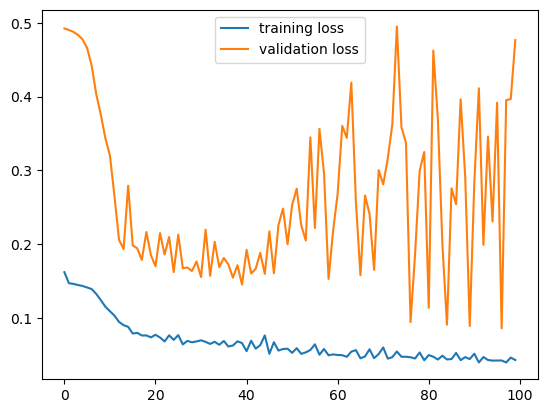

In [52]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)

112/112 [==============================] - 0s 870us/step


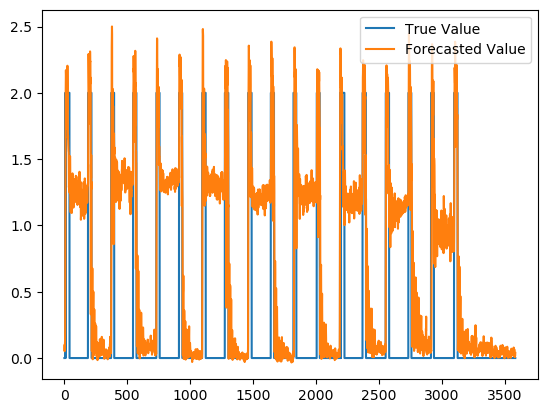

In [53]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY, label = 'True Value')
plt.plot(y_pred, label = 'Forecasted Value')
plt.legend()

In [1]:
X

NameError: name 'X' is not defined

In [ ]:
# Predictions using the 'sliding/rolling window approach'
# Multi step forecast.
# Using self predictions for making future predictions
# Very much different from a univariate -- You will need predictions (or known) values for your independent values.
# Nonetheles, you will follow the same steps as shown for the univariate multi-step process.

In [153]:
len(X[threshold:])

3583